# **Mini Project**

**Task:-** Image Classification using Machine Learning

**Name:-** Rohan Gupta

**email:-** rohaninjmu@gmail.com

In [1]:
!pip install bing-image-downloader

In [6]:
cd /content/drive/My Drive/Minor Project - Rohan Gupta

/content/drive/My Drive/Minor Project - Rohan Gupta


In [7]:
!mkdir Dataset

# **Creating Dataset**

200 images each for 2 different fruits.

**Categories**


1. apple
2. banana



In [8]:
from bing_image_downloader import downloader
downloader.download('apple fruit', limit=200,  output_dir='Dataset', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('banana fruit', limit=200,  output_dir='Dataset', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.znaturalfoods.com/1501-thickbox_default/apple-powder-organic.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.theayurveda.org/wp-content/uploads/2015/08/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://dreamicus.com/data/apple/apple-01.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://aggie-horticulture.tamu.edu/vegetable/files/2011/10/apple26.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://oneflowyogastudio.com/

# **Data Preprocessing**



1.   Change Dimension to (150 * 150 * 3)
2.   Flatten images i.e, ccondense all the image layers into a single layer image.
3. Create a Dataframe of all the images.



In [ ]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []
flattened_images = []

DATADIR = '/content/drive/My Drive/Minor Project - Rohan Gupta/Dataset'
CATEGORIES = ['apple fruit', 'banana fruit']
i=0
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    if img[-3:]!='jpg' and img[-3:]!='jpeg' and img[-3:]!='png':
      continue
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flattened_images.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
    print(i)
    i+=1

target = np.array(target)
images = np.array(images)
flattened_images = np.array(flattened_images)


In [90]:
import pandas as pd
df = pd.DataFrame(flattened_images)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,0.607843,0.164706,0.140980,0.608431,0.144510,0.133333,0.621569,0.122549,0.115686,0.669412,0.100000,0.117647,0.686471,0.105882,0.133333,0.619216,0.084118,0.115490,0.553725,0.036667,0.062157,0.500980,0.015686,0.039216,0.482353,0.015686,0.047059,0.507647,0.023529,0.058824,0.553137,0.027451,0.066667,0.620784,0.027451,0.079608,0.696078,0.124510,0.147059,0.749020,...,0.527451,0.162745,0.189216,0.527451,0.154902,0.186275,0.545098,0.152941,0.180392,0.572745,0.154902,0.180392,0.630000,0.169216,0.188824,0.688235,0.208824,0.208824,0.721569,0.238627,0.222353,0.727451,0.254902,0.231373,0.729412,0.298039,0.252941,0.662353,0.279804,0.226275,0.458824,0.200000,0.129412,0.322353,0.119020,0.058235,0.506863,0.254314,0.123137,0
...,...,...,...,...,...,...,...,...,...,...,...,.

# **Model Creation**


1.   Split data into training data and testing data.
2.   Initialize a KNeighborsClassifier object.
3.   Get the ideal value of n_neighbors using GridSearchCV.
4.   Fit the model on training data



In [91]:
df.to_csv('fruit_dataset.csv')

In [93]:
x = df.iloc[:, :67500].values
y = df.iloc[:, 67500].values

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
z = np.arange(1,25)
param = {'n_neighbors':z}
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
model_grid.best_params_

{'n_neighbors': 2}

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=3)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# **Model Accuracy on Testing Data**

In [105]:
y_pred = model.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.845360824742268

# **Test Trained Model**

In [107]:
images = []
flattened_images = []

DATADIR = '/content/drive/My Drive/Minor Project - Rohan Gupta/Test Images'

for img in os.listdir(DATADIR):
  img_array = imread(os.path.join(DATADIR,img))
  img_resized = resize(img_array,(150,150,3))
  flattened_images.append(img_resized.flatten())
  images.append(img_resized)

images = np.array(images)
flattened_images = np.array(flattened_images)

In [108]:
df = pd.DataFrame(flattened_images)
test = df.iloc[:, :67500].values

Apple
Banana


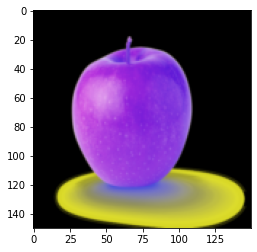

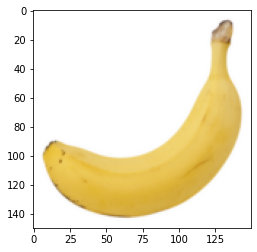

In [111]:
pred = model.predict(test)
import matplotlib.pyplot as plt
for i in range(len(images)):
  plt.figure()
  print('Apple' if pred[i] == 0 else 'Banana')
  plt.imshow(images[i])
  